<a href="https://colab.research.google.com/github/Camilob21/Ejercicios_En_Clase/blob/main/Simulacion_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulacion**

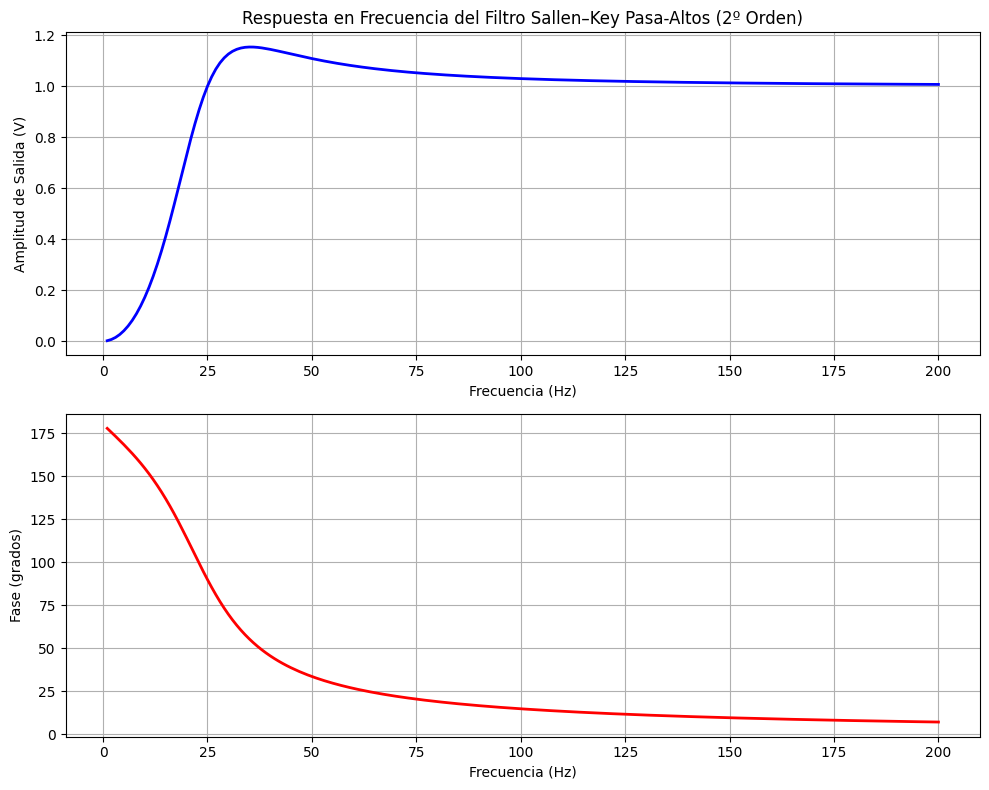

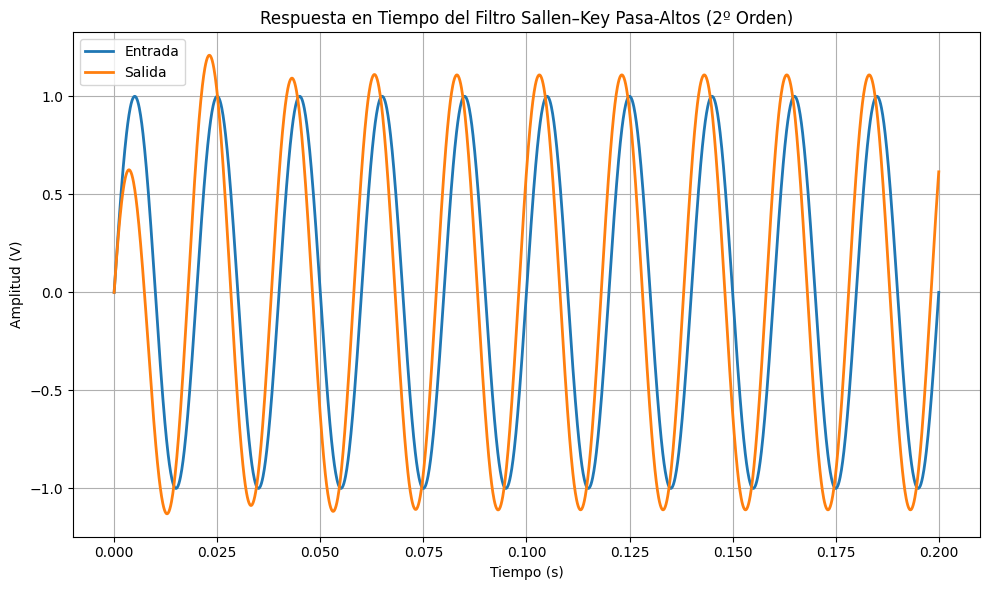

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro
R = 100e3        # Resistencia en ohmios
C = 63.7e-9      # Capacitancia en faradios
Vin_amp = 1.0    # Amplitud de la señal

# Parámetros para el análisis en frecuencia
f_start = 1    # Frecuencia inicial en Hz
f_stop  = 200  # Frecuencia final en Hz
f_step  = 1   # Paso en Hz
f = np.arange(f_start, f_stop + f_step, f_step)  # vector de frecuencias
w = 2 * np.pi * f  # convertir a radianes/segundo

# Función de transferencia del filtro Sallen–Key Pasa-altos (2º Orden)
s = 1j * w
H = (s**2) / (s**2 + (s/(R*C)) + 1/(R*C)**2)

# Cálculo de la salida en el dominio de la frecuencia:
# Amplitud en voltios
Vout_amp_freq = Vin_amp * np.abs(H)
# Fase en grados
Vout_phase_freq = np.angle(H, deg=True)

# GRaficas
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(f, Vout_amp_freq, 'b', linewidth=2)
plt.title("Respuesta en Frecuencia del Filtro Sallen–Key Pasa-Altos (2º Orden)")
plt.ylabel("Amplitud de Salida (V)")
plt.xlabel("Frecuencia (Hz)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(f, Vout_phase_freq, 'r', linewidth=2)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Simulación en el Dominio del Tiempo
# Definir el vector de tiempo para la simulación
T_total = 0.2        # Tiempo total de simulación en segundos
N_points = 2000      # Número de puntos
t = np.linspace(0, T_total, N_points)

# Definir la señal de entrada en el tiempo
f_in = 50.0  # Frecuencia de la señal de entrada en Hz
Vin_time = Vin_amp * np.sin(2 * np.pi * f_in * t)

# Definir el sistema utilizando la función de transferencia
# Coeficientes del numerador (s^2) y denominador (s^2 + s/(R*C) + 1/(R*C)^2)
num_coeff = [1, 0, 0]
den_coeff = [1, 1/(R*C), 1/(R*C)**2]
sys = signal.lti(num_coeff, den_coeff)

# Simular la respuesta en el tiempo con lsim
t_out, Vout_time, _ = signal.lsim(sys, U=Vin_time, T=t)


# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(t, Vin_time, label="Entrada", linewidth=2)
plt.plot(t_out, Vout_time, label="Salida", linewidth=2)
plt.title("Respuesta en Tiempo del Filtro Sallen–Key Pasa-Altos (2º Orden)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
